# Project: Wrangling and Analyze Data

#### Wrangle and Analyze the WeRateDogs Twitter Archive

#### Joshua Emmanuelaudu

## Table of Contents
### <ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#summary">Summary of Assessment</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#storing">Storing</a></li>
<li><a href="#analysis">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
# Introduction

The twitter archive is based on the "We Rate Dogs" twitter account. This data quality and tidyness has been validated and cleaned to create an enhanced data for the purpose of effective data wrangling and analysis.

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_archive = pd.read_csv(r'C:\Users\hp\Documents\ALX Files\Data Wrangling\project_2\twitter-archive-enhanced.csv')

In [3]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
import requests
import os

In [6]:
# Programmatically downloading the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

#### status code response 200 means the downloading operation was successful

In [7]:
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [8]:
# read downloaded image prediction file
df_images = pd.read_csv('image_predictions.tsv', sep='\t' )

In [9]:
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
import json

In [11]:
#read in already downloaded Json data provided by Udacity

tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))   


In [12]:
#creating a list of data from tweet_json.txt
list_tweets = []
for json_data in tweets:
    list_tweets.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
 #creating a Dataframe
df_tweets = pd.DataFrame(list_tweets, columns = ['id', 'retweet_count' , 'favorite_count'])


In [13]:
df_tweets.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [51]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
#convert to csv
df_tweets.to_csv('df_tweets.csv', index = False)

<a id='assessing'></a>

## Assessing Data


#### The datasets gathered are: 
- twiiter archive = ```df_archive```

- images predictions = ```df_images```

- twitter json = ```df_tweets```

## ``Twitter Archive``

We check the `df_archive.info()` inorder to outline the quality or tidyness issues if there are any

In [84]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [89]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Observations
- The *retweeted_status_user_id*, *retweeted_status_id*  *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_timestamp* columns does not relate to the original tweet with a lot of missing data.
- There are 59 tweets with missing data in *expanded_urls* column
- The `source` column would be more clearer if the html rows are removed
- The _timestamp_ column is in `string` format instead of `datetime`
- The _timestamp_ column has a quality issue of unneccessary value added which is the +0000
- The dog types have 4 different columns (*doggo*, *floofer*,*pupper*, *puppo*)


In [63]:
df_archive.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
334,832682457690300417,NaN,NaN,2017-02-17 20:05:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,NaN,NaN,NaN,https://twitter.com/telegraph/status/832268302...,13,10,None,None,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
309,835536468978302976,NaN,NaN,2017-02-25 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,8.352641e+17,4.196984e+09,2017-02-24 23:04:14 +0000,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,13,10,Arya,None,None,None,None
1069,740365076218183684,NaN,NaN,2016-06-08 02:09:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740365076...,10,10,None,None,None,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None
488,813944609378369540,NaN,NaN,2016-12-28 03:08:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bruce. He never backs d...,7.902771e+17,4.196984e+09,2016-10-23 19:42:02 +0000,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
600,798673117451325440,NaN,NaN,2016-11-15 23:44:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I shall call him squishy and he...,6.755011e+17,4.196984e+09,2015-12-12 02:23:01 +0000,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None


### Observations

From the `df_archive.sample()` seen, soe quality and tidyness issues were revealed.

### Quality issues

- the _name_ column has strings that are not valid e.g. "the", "None", "an", "a" .
- the _timestamp_ column dates are in string format

### Tidiness issues

- The dog types have 4 different columns (*doggo*, *floofer*,*pupper*, *puppo*)


In [126]:
sum(df_archive.retweeted_status_id.notnull())

181

In [124]:
sum(df_archive.in_reply_to_status_id.notnull())

78

#### Observation

- There are 181 retweets `retweeted_status_id`
- There are 78 reply tweets `in_reply_to_status_id`

## `name` column

In [74]:
#checking the name column
df_archive.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

#### Observation

- The dog names are all capitalize, so we could make a valid assumption that the words that do not have the first word capitalized is not a dog name. 

- [None] are also part of the dog names which do not seem to be actual names of dogs

In [75]:
# names that the firts letters are NOT capitalized
lowercase_dogs = df_archive.name.str.contains('^[a-z]', regex = True)
df_archive[lowercase_dogs].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [77]:
len(df_archive[lowercase_dogs])

109

#### Observation

- The total number of names of dogs that do not begin with a Capitalized letter is 109. Which means 109 tweets do not have a valid dog name.

- And there are dog names with 745 "None". 

## `expanded_urls` column

The tweets that have missing data, checking to see if they are from replies or retweets?

In [78]:
# tweets with missing urls
sum(df_archive.expanded_urls.isna())

59

In [79]:
# tweets with missing urls are replies or retweets?
sum(df_archive.expanded_urls.isna() & \
    (df_archive.in_reply_to_status_id.notnull() | \
     df_archive.retweeted_status_id.notnull()))

56

#### Observation

- 59 tweets that are missing in the expanded_urls, 56 are replies or retweets.

In [83]:
# the remaining tweets that are missing url but not included in the reply or retweet
remain = df_archive.expanded_urls.isna() & \
       df_archive.in_reply_to_status_id.isna() & \
       df_archive.retweeted_status_id.isna()
df_archive[remain][['tweet_id', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator']]



,tweet_id,text,expanded_urls,rating_numerator,rating_denominator
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN,12,10
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN,10,10
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN,10,10


#### Observation

The 3 remaining missing tweets are at the indexes dispalyed. They all have ratings. We need to confirm if these tweets are in the _df_images_ and the _df_tweets_ data tables.

In [85]:
## checking if the tweets are in the df_images table

tweets = [828361771580813312, 785515384317313025, 696518437233913856]
check_tweets = df_images.tweet_id.isin(tweets)
sum(check_tweets)

0

In [88]:
## checking if the tweets are in the df_images table

tweets = [828361771580813312, 785515384317313025, 696518437233913856]
check_tweets = df_tweets.id.isin(tweets)
df_tweets[check_tweets]

,id,retweet_count,favorite_count
374,828361771580813312,195,2408
706,785515384317313025,1477,6800
1443,696518437233913856,1887,4274


#### Observation

- We confirmed that the 3 tweets are not present in the `df_images` table but are present in the `df_tweets` table.

## `rating_denominator` columns

In [145]:
# Checking the stats of these columns
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#### Observation
The decribe() stats revealed some quality issues in the `rating_numerator` and `rating_denominator` columns 

- The minimum values are 0 for both
- The maximum values are 1776 and 170 respectively

In [146]:
df_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [147]:
sum(df_archive.rating_denominator != 10)

23

#### Observation
- As seen, there are quite a number of rationgs that way larger than the fixed value 10. It is assumed that some of which would be part of the _retweet_ and _replies_ columns.

## `source` column 



In [99]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Observation
There are only 4 types of sources, and they would be clearer to see if the html codes are removed.

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

## `doggo`, `floofer`, `pupper` , and `puppo` columns

These dog stages are to be in one column. Lets check `value_counts()` for each stage 

In [100]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [101]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [102]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [103]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Observation
From this we have an idea of how many tweets have the dog stages specified in them. And we can conclude that there are more tweetd with no specifications as `None` than the ones with specifications.

## Image Predictions

We check the `df_images.info()` inorder to outline the quality issues if there are any

In [104]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [168]:
#check for duplicate jpg_url
len(df_images[df_images.jpg_url.duplicated()])


66

In [106]:
df_images.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2035,884162670584377345,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,4.914760e-02,True
1551,793135492858580992,https://pbs.twimg.com/media/CwHIg61WIAApnEV.jpg,1,bakery,0.737041,False,saltshaker,0.052396,False,teddy,4.659260e-02,False
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,English_springer,0.129830,True,pug,7.380570e-02,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,3.890560e-02,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,2.307390e-03,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,8.048360e-02,True
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,8.145870e-03,False
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,4.990060e-02,True
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,2.428450e-02,True


#### Observation
- From visually examining this table, we can see that not all the entries predict dog. Let's programatically examine the predictions. 

In [107]:
df_images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [108]:
df_images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [109]:
df_images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [134]:
# Let's view 25 of the entries that don't predict dogs
df_images[~df_images.p1_dog & \
               ~df_images.p2_dog & \
               ~df_images.p3_dog][['tweet_id', 'p1', 'p1_dog',
                    'p2', 'p2_dog', 'p3', 'p3_dog']].head(25)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [131]:
sum(~df_images.p1_dog & \
    ~df_images.p2_dog & \
    ~df_images.p3_dog)

324

#### Observation

- Having gone through the `value_counts()` in each prediction we conclude that there are more than 500 entries that are not dog predictions. Combined, there are 324 instances that there is no dog prediction.

## Twitter Json
We check the `df_tweets.info()` inorder to outline the quality issues if there are any

In [118]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [120]:
df_tweets.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Observation
- The column name `id` is `tweet_id` in other tables. Renaming would be neccessary to ensure consistency

<a id='summary'></a>
## Summary of Assessment

## Quality

### `df_archive`

1. The `timestamp` entries have "+0000" values added, which is not neccessary.

2. The timestamp column is in string format instead of datetime format

3. There are 181 retweets which was determined by checking the `retweeted_status_id` column

4. There are 78 tweet replies which was determined by checking the `in_reply_to_status_id` column

5. There are tweet ratings with `rating_denominator` columnwith values NOT equal to 10

6. The total number of names of dogs that do not begin with a Capitalized letter is 109. And it was concluded that the names starting with lowecase is not a valid name. Which means 109 tweets do not have a valid dog name.


7. There are 59 missing tweets in `the expanded_urls` column
- 56 of themissing tweets are retweets or replies
- 3 tweets are not present in the `df_images` table but are present in the `df_tweets` table.

8. There are only 4 types of sources, and they would be clearer to see if the html codes are removed.

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

### `df_images`

9. Remove entries that have `p1_dog`, `p2_dog`, & `p3_dog` values set to false. These entries are not dogs



10. In the `jpg_url` column there are several duplicates



11. The total amount of entries are less than the total amount of tweets available in the archive.
 - `df_images`= 2075 and `df_archive` = 2356, which is 281 entries less.

### All Tables

12. Convert data type of tweet_id to object `string` data type for merging

## Tidiness

### `df_archive`

1. The Assessment Key Points indicates that we’re only interested in “original tweets”, no “retweets”; and these tweets are stored `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns

2. The Assessment key points also indicates that Reply tweets are also not “original tweets” either; and these tweets are stored `in_reply_to_status_id` and `in_reply_to_user_id` columns.

3. There are 4 columns that do not comform to the rules of tidy data. `doggo`, `floofer`, `pupper`, `puppo` columns should be in one column as they are dog stages.

### `df_images`

4. The dog breed that was predicted with the highest confidence level can be combined with the `df_archive` table .

### `df_tweets`

5. The `df_tweets` table should be combined with the archive table.

6. The column name id is tweet_id in other tables. Renaming would be neccessary to ensure consistency

<a id='cleaning'></a>
## Cleaning Data


In [15]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_images_clean = df_images.copy()
df_tweets_clean = df_tweets.copy()


## Quality `df_archive` Issue #1:

The `timestamp` entries have "+0000" values added, which is not neccessary.

#### Define:
- Remove +0000 from timestamp

#### Code

In [16]:
df_archive_clean.timestamp = df_archive_clean.timestamp.str[:-5].str.strip()

#### Test

In [17]:
df_archive_clean.timestamp.head(3)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
Name: timestamp, dtype: object

## Quality`df_archive` Issue #2:

The `timestamp` column is in string format. Instead of datetime

#### Define
- Convert `timestamp` column to datetime data type

#### Code

In [18]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['timestamp'] = df_archive_clean.timestamp.dt.floor('s')

#### Test


In [19]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

## Quality `df_archive` Issue #3
We are not interested in entries related to retweets.

#### Define
- Drop all columns related to retweets: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

#### Code

In [20]:
df_archive_clean = df_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

#### Test

In [21]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2356 non-null   int64         
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2356 non-null   datetime64[ns]
 4   source                 2356 non-null   object        
 5   text                   2356 non-null   object        
 6   expanded_urls          2297 non-null   object        
 7   rating_numerator       2356 non-null   int64         
 8   rating_denominator     2356 non-null   int64         
 9   name                   2356 non-null   object        
 10  doggo                  2356 non-null   object        
 11  floofer                2356 non-null   object        
 12  pupper                 2356 non-null   object        
 13  pup

## Quality `df_archive` Issue #4
We are not interested in entries related to replies.

#### Define
- Drop all columns related to replies: `in_reply_to_status_id` and `in_reply_to_user_id`

#### Code

In [22]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

#### Test

In [23]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

## Quality `df_archive` Issue #5
There are tweet ratings with `rating_denominator` columnwith values NOT equal to 10


#### Define
- Drop tweets with rating_denominator values that are NOT equal to 10.

#### Code

In [24]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_denominator == 10]

#### Test

In [25]:
df_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2333
Name: rating_denominator, dtype: int64

## Quality `df_archive` Issue #6
There are a lot of entries that are lower case which we've specified as not valid names because they are just words. We won't remove the entries because even though they do not have names, they are still valid dogs.

#### Define
- Replace all the lowercase words in the `name` column with the string "none"

#### Code

In [26]:
lcase_names = df_archive_clean.name.str.contains('^[a-z]', regex = True)
df_archive_clean[lcase_names].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
unacceptable     1
very             5
Name: name, dtype: int64

In [27]:
df_archive_clean.loc[lcase_names, 'name'] = "none"

#### Test

In [28]:
df_archive_clean[lcase_names].name.value_counts().sort_index()

none    106
Name: name, dtype: int64

## Quality `df_archive` Issue #7

There are missing tweets in the `expanded_urls` column


#### Define
- Remove tweets with missing urls in the `expanded_urls` column

#### Code

In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2333 non-null   int64         
 1   timestamp           2333 non-null   datetime64[ns]
 2   source              2333 non-null   object        
 3   text                2333 non-null   object        
 4   expanded_urls       2278 non-null   object        
 5   rating_numerator    2333 non-null   int64         
 6   rating_denominator  2333 non-null   int64         
 7   name                2333 non-null   object        
 8   doggo               2333 non-null   object        
 9   floofer             2333 non-null   object        
 10  pupper              2333 non-null   object        
 11  puppo               2333 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 236.9+ KB


In [30]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notnull()]

#### Test

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2278 non-null   int64         
 1   timestamp           2278 non-null   datetime64[ns]
 2   source              2278 non-null   object        
 3   text                2278 non-null   object        
 4   expanded_urls       2278 non-null   object        
 5   rating_numerator    2278 non-null   int64         
 6   rating_denominator  2278 non-null   int64         
 7   name                2278 non-null   object        
 8   doggo               2278 non-null   object        
 9   floofer             2278 non-null   object        
 10  pupper              2278 non-null   object        
 11  puppo               2278 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 231.4+ KB


## Quality `df_archive` Issue #8
There are only 4 types of sources, and they would be clearer to see if the html codes are removed.

#### Define
- Remove HTML codes from rows in source column

#### Code

In [32]:
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_clean['source'] = df_archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3001637299.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['source'] = df_archive_clean['source'].str.replace(
C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3001637299.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['source'] = df_archive_clean['source'].str.replace(
C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3001637299.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['source'] = df_archive_clean['source'].str.replace(
C:\Users\hp\AppData\Local\Temp\ipykernel_11100\3001637299.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['source'] = df_archive_clean['source'].str.replace(


#### Test

In [33]:
df_archive_clean.source.value_counts()

Twitter for iPhone    2144
Vine                    91
Twitter Web Client      32
TweetDeck               11
Name: source, dtype: int64

## Quality `df_images` Issue #9
Remove entries that have p1_dog, p2_dog, & p3_dog values set to false. These entries are not dogs. Hence they won't be needed 

#### Define 
- Drop rows with entries that have False p1_dog, p2_dog, & p3_dog values.

#### Code

In [34]:
df_images_clean = df_images_clean[((df_images_clean['p1_dog'] == True) & 
                  (df_images_clean['p2_dog'] == True) & 
                  (df_images_clean['p3_dog'] == True))]

#### Test

In [35]:
df_images_clean.p1_dog.value_counts()

True    1243
Name: p1_dog, dtype: int64

In [36]:
df_images_clean.p2_dog.value_counts()

True    1243
Name: p2_dog, dtype: int64

In [37]:
df_images_clean.p3_dog.value_counts()

True    1243
Name: p3_dog, dtype: int64

## Quality df_images Issue #9
In the `jpg_url` column there are several duplicates

#### Define 
- Drops rows with duplicates in the `jpg_url` column

#### Code

In [38]:
# Check the rows with duplicates
len(df_images_clean[df_images_clean.jpg_url.duplicated()])

37

In [39]:
# drop all rows with duplicates
df_images_clean = df_images_clean.drop_duplicates(subset='jpg_url')

#### Test

In [40]:
len(df_images_clean[df_images_clean.jpg_url.duplicated()])

0

## Tidiness `df_archive` Issue #1
There are 4 columns that do not comform to the rules of tidy data. `doggo`, `floofer`, `pupper`, `puppo` columns should be in one column as they are dog stages.

#### Define
- Combine the 4 columns into 1 category

#### Code

In [41]:
df_archive_clean[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2278,2278,2278,2278
unique,2,2,2,2
top,None,None,None,None
freq,2184,2268,2023,2249


In [42]:
# Source:    https://github.com/
# replace the stages name with 1, and 'None' with 0, we store it as burner variable which is a dummy variable
burner = lambda x: 0 if x == 'None' else 1

df_archive_clean.doggo = df_archive_clean.doggo.apply(burner)
df_archive_clean.floofer = df_archive_clean.floofer.apply(burner)
df_archive_clean.pupper = df_archive_clean.pupper.apply(burner)
df_archive_clean.puppo = df_archive_clean.puppo.apply(burner)

# by adding the stages columns, we can see how many are 'none' and how many stages are set
df_archive_clean['none'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + \
                        df_archive_clean['pupper'] + df_archive_clean['puppo']

# have a look at what we have before we continue...
df_archive_clean['none'].value_counts()

0    1904
1     360
2      14
Name: none, dtype: int64

#### Observation
- From the result, it is is revealed that there are 14 tweets that have 2 dog stages.

In [43]:
# Source:    https://github.com/
# NO stages specified then set 'None' to 1
stages_none = lambda x: 1 if x == 0 else 0

# reset values 
df_archive_clean['none'] = df_archive_clean['none'].apply(stages_none)

# Order the stages , floofer, puppo, doggo and pupper
# set the selection for dog stage based on count order
stages = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (df_archive_clean[stages[0]] == 1),
    (df_archive_clean[stages[1]] == 1),
    (df_archive_clean[stages[2]] == 1),
    (df_archive_clean[stages[3]] == 1),
    (df_archive_clean[stages[4]] == 1)]

# select the dog stage based on the first successful condition; stages[4] is 'None'
df_archive_clean['stages'] = np.select(conditions, stages, default = stages[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
df_archive_clean.drop(stages, axis = 1, inplace = True)

# set the 'stages' column data type to category
df_archive_clean['stages'] = df_archive_clean.stages.astype('category')

# Source for algorithm:    https://github.com/

#### Test

In [44]:
df_archive_clean.stages.value_counts()

none       1904
pupper      243
doggo        92
puppo        29
floofer      10
Name: stages, dtype: int64

In [45]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2278 non-null   int64         
 1   timestamp           2278 non-null   datetime64[ns]
 2   source              2278 non-null   object        
 3   text                2278 non-null   object        
 4   expanded_urls       2278 non-null   object        
 5   rating_numerator    2278 non-null   int64         
 6   rating_denominator  2278 non-null   int64         
 7   name                2278 non-null   object        
 8   stages              2278 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 162.6+ KB


## Tidiness `df_images` Issue #2
The dog breed that was predicted with the highest confidence level can be combined with the df_archive table. We will only retain the tweets with images 

#### Define
The process for this implementation is in 2 steps. 
- We create the columns in the `df_images` first by forming two columns. `breed` and `confidence`. Copy the `Breed` with the highest confidence level into `breed` column and the corresponding confidence level into the `confidence` column


- Merge the new columns into the `df_archive` table, then we have just tweets with images. After we round the confidence levels to percentage.

In [46]:
# Source:    https://github.com/
# Since the predictions already have been cleaned of all false prediction, we go ahead

# setup the criterias for selection
criterias = [(df_images_clean['p1_dog'] == True),
              (df_images_clean['p2_dog'] == True),
              (df_images_clean['p3_dog'] == True)]

# set the choice order based on the selection criterias for predicted breed
select_breed = [df_images_clean['p1'], 
                 df_images_clean['p2'],
                 df_images_clean['p3']]

# set the choice order for confidence level based on the selection conditions
select_confidence = [df_images_clean['p1_conf'], 
                      df_images_clean['p2_conf'], 
                      df_images_clean['p3_conf']]

# select the predicted breed based on the first successful condition
df_images_clean['breed'] = np.select(criterias, select_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
df_images_clean['confidence'] = np.select(criterias, select_confidence, 
                                            default = 0)

#### Test
- Step 1

In [47]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### Step 2
- Merge the newly created columns `breeds` and `confidence` to the `df_archive` table using "inner join", conert to percentage and drop from `df_images_clean` table


In [48]:
case_cols = ['tweet_id', 'breed', 'confidence']
df_archive_clean = pd.merge(df_archive_clean, df_images_clean[case_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
df_archive_clean.confidence = (df_archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
df_images_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

### Test

In [49]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stages',
 'breed',
 'confidence']

In [50]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1191
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1192 non-null   int64         
 1   timestamp           1192 non-null   datetime64[ns]
 2   source              1192 non-null   object        
 3   text                1192 non-null   object        
 4   expanded_urls       1192 non-null   object        
 5   rating_numerator    1192 non-null   int64         
 6   rating_denominator  1192 non-null   int64         
 7   name                1192 non-null   object        
 8   stages              1192 non-null   category      
 9   breed               1192 non-null   object        
 10  confidence          1192 non-null   int32         
dtypes: category(1), datetime64[ns](1), int32(1), int64(3), object(5)
memory usage: 99.2+ KB


In [51]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,breed,confidence
327,793120401413079041,2016-10-31 16:00:13,Twitter for iPhone,This is Robin. She's desperately trying to do ...,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,none,Labrador_retriever,72
76,867774946302451713,2017-05-25 16:10:44,Twitter for iPhone,Meet Harold. He's h*ckin cooperative. 13/10 g...,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,none,Border_collie,66
371,780459368902959104,2016-09-26 17:29:48,Twitter for iPhone,"This is Bear. Don't worry, he's not a real bea...",https://twitter.com/dog_rates/status/780459368...,11,10,Bear,none,Great_Dane,38
1089,669328503091937280,2015-11-25 01:35:25,Twitter for iPhone,This is Kirk. He just saw a bacon wrapped tenn...,https://twitter.com/dog_rates/status/669328503...,12,10,Kirk,none,Siberian_husky,42
1139,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,none,Rottweiler,99


## Tidiness `df_tweets` Issue  #3
The column name id is tweet_id in other tables. Renaming would be neccessary to ensure consistency

#### Define
- Rename column name `id` to `tweet_id`

#### Code

In [52]:
df_tweets_clean = df_tweets_clean.rename({'id':'tweet_id'}, axis=1)

#### Test

In [53]:
list(df_tweets_clean)

['tweet_id', 'retweet_count', 'favorite_count']

In [54]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Tidiness `df_tweets` Issue  #4
The `df_tweets` table should be combined with the `df_archive` table

#### Define

Combine the `retweet_count` and `favorite_count` columns with the `df_archive` table, joining on tweet_id.

#### Code

In [55]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [56]:
df_archive_clean = pd.merge(df_archive_clean, df_tweets_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [57]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1191
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1192 non-null   int64         
 1   timestamp           1192 non-null   datetime64[ns]
 2   source              1192 non-null   object        
 3   text                1192 non-null   object        
 4   expanded_urls       1192 non-null   object        
 5   rating_numerator    1192 non-null   int64         
 6   rating_denominator  1192 non-null   int64         
 7   name                1192 non-null   object        
 8   stages              1192 non-null   category      
 9   breed               1192 non-null   object        
 10  confidence          1192 non-null   int32         
 11  retweet_count       1192 non-null   int64         
 12  favorite_count      1192 non-null   int64         
dtypes: category(1), datetime64[ns](1), int32(1), int

In [58]:
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,breed,confidence,retweet_count,favorite_count
96,860524505164394496,2017-05-05 16:00:04,Twitter for iPhone,This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,none,Bedlington_terrier,28,5698,24678
455,756651752796094464,2016-07-23 00:46:50,Twitter for iPhone,This is Gert. He just wants you to be happy. 1...,https://twitter.com/dog_rates/status/756651752...,11,10,Gert,none,Pembroke,29,1511,5612
1008,672594978741354496,2015-12-04 01:55:13,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,pupper,Great_Pyrenees,75,661,1411
1021,672160042234327040,2015-12-02 21:06:56,Twitter for iPhone,This is Bubba. He's a Titted Peebles Aorta. Ev...,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,pupper,pug,56,395,918
929,675888385639251968,2015-12-13 04:02:03,Twitter for iPhone,Breathtaking scene. A father taking care of hi...,https://twitter.com/dog_rates/status/675888385...,10,10,None,none,West_Highland_white_terrier,67,1067,2581
674,703611486317502464,2016-02-27 16:03:45,Twitter for iPhone,Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,pupper,Pembroke,75,1709,4229
348,786595970293370880,2016-10-13 15:54:28,Twitter for iPhone,This is Dale. He's a real spookster. Did me qu...,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,none,Pembroke,70,3601,10497
247,813812741911748608,2016-12-27 18:24:12,Twitter for iPhone,"Meet Gary, Carrie Fisher's dog. Idk what I can...",https://twitter.com/dog_rates/status/813812741...,14,10,Gary,none,French_bulldog,70,16267,40402
1010,672523490734551040,2015-12-03 21:11:09,Twitter for iPhone,When she says she'll be ready in a minute but ...,https://twitter.com/dog_rates/status/672523490...,10,10,None,none,golden_retriever,56,189,696
1184,666063827256086533,2015-11-16 01:22:45,Twitter for iPhone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,10,none,none,golden_retriever,77,232,496


## Tidiness `df_archive` Issue  #5

Since all the values in the `rating_denominator` column are the same. We will drop it and rename the `rating_numerator` to just `rating`.

#### Define
- drop the `rating_denominator` column
- rename the `rating_numerator` column to `rating`

#### Code

In [59]:
df_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
df_archive_clean = df_archive_clean.rename({'rating_numerator':'rating'}, axis=1)

#### Test

In [60]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stages',
 'breed',
 'confidence',
 'retweet_count',
 'favorite_count']

## Tidiness archive Issue #6
Will not need the `expanded_urls` for analysis

#### Define
- Drop `expanded_urls` column

#### Code

In [61]:
df_archive_clean = df_archive_clean.drop(['expanded_urls'], axis = 1)

#### Test

In [62]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'name',
 'stages',
 'breed',
 'confidence',
 'retweet_count',
 'favorite_count']

## Tidiness `archive` Issue  #6

We want to rearrange the columns to move the numerical data needed for analysis to the left side.

#### Define
- Rearrange the columns to make columns with the numerical data quickly seen. By moving the columns to the left.

#### Code

In [63]:
col_list = list(df_archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'rating', 'name', 'stages', 'breed', 'confidence', 'retweet_count', 'favorite_count']


In [64]:
# rearrange the columns
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stages', 'source', 'text']


In [65]:
df_archive_clean = df_archive_clean.reindex(columns=col_list)

#### Test

In [66]:
df_archive_clean.sample(30)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stages,source,text
844,682259524040966145,2015-12-30 17:58:40,9,1375,4578,Siberian_husky,43,Jax,none,Twitter for iPhone,Meet Jax. He's an Iglesias Hufflepoof. Quite t...
18,886736880519319552,2017-07-16 23:58:41,13,3443,12306,kuvasz,30,Mingus,none,Twitter for iPhone,This is Mingus. He's a wonderful father to his...
276,807621403335917568,2016-12-10 16:22:02,14,4288,16236,golden_retriever,87,Ollie,pupper,Twitter for iPhone,This is Ollie Vue. He was a 3 legged pupper on...
1121,668190681446379520,2015-11-21 22:14:07,12,210,696,Blenheim_spaniel,95,Skittles,none,Twitter for iPhone,This is Skittles. I would kidnap Skittles. Pin...
586,718234618122661888,2016-04-08 00:30:51,11,1127,4217,malamute,37,Suki,none,Twitter for iPhone,This is Suki. She was born with a blurry tail ...
182,828650029636317184,2017-02-06 17:02:17,14,1544,10467,golden_retriever,64,none,none,Twitter for iPhone,"Occasionally, we're sent fantastic stories. Th..."
152,838476387338051585,2017-03-05 19:48:43,13,5484,24664,Great_Pyrenees,99,Stanley,none,Twitter for iPhone,This is Stanley. Somehow he heard you tell him...
349,786363235746385920,2016-10-13 00:29:39,13,4072,12189,golden_retriever,92,Rizzo,doggo,Twitter for iPhone,This is Rizzo. He has many talents. A true ren...
706,699072405256409088,2016-02-15 03:27:04,12,1325,3296,Shih-Tzu,59,None,none,Twitter for iPhone,ERMAHGERD 12/10 please enjoy https://t.co/7WrA...
683,702217446468493312,2016-02-23 19:44:20,9,1526,5268,golden_retriever,24,None,none,Twitter for iPhone,"I know it's tempting, but please stop sending ..."


<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
df_archive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='analysis'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:
# let's make a copy of the twitter archive master table for analysis
df_analysis = df_archive_clean.copy()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1191
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1192 non-null   int64         
 1   timestamp       1192 non-null   datetime64[ns]
 2   rating          1192 non-null   int64         
 3   retweet_count   1192 non-null   int64         
 4   favorite_count  1192 non-null   int64         
 5   breed           1192 non-null   object        
 6   confidence      1192 non-null   int32         
 7   name            1192 non-null   object        
 8   stages          1192 non-null   category      
 9   source          1192 non-null   object        
 10  text            1192 non-null   object        
dtypes: category(1), datetime64[ns](1), int32(1), int64(4), object(4)
memory usage: 99.2+ KB


In [69]:
df_analysis.sample(10)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stages,source,text
343,787810552592695296,2016-10-17 00:20:47,11,3540,9717,pug,36,Frank,none,Twitter for iPhone,This is Frank. He wears sunglasses and walks h...
418,768473857036525572,2016-08-24 15:43:39,11,3958,15110,Labrador_retriever,73,Chevy,none,Twitter for iPhone,Meet Chevy. He had a late breakfast and now ha...
51,876120275196170240,2017-06-17 16:52:05,13,4903,28490,Bernese_mountain_dog,53,Venti,none,Twitter for iPhone,"Meet Venti, a seemingly caffeinated puppoccino..."
10,889278841981685760,2017-07-24 00:19:32,13,5637,25652,whippet,62,Oliver,none,Twitter for iPhone,This is Oliver. You're witnessing one of his m...
272,808838249661788160,2016-12-14 00:57:20,13,3536,11271,Rottweiler,36,Ito,none,Twitter for iPhone,This is Ito. He'll be your uber driver tonight...
840,682662431982772225,2015-12-31 20:39:41,11,1207,3326,beagle,41,Joey,none,Twitter for iPhone,Meet Joey and Izzy. Joey only has one ear that...
7,889665388333682689,2017-07-25 01:55:32,13,8538,38818,Pembroke,96,None,puppo,Twitter for iPhone,Here's a puppo that seems to be on the fence a...
465,753398408988139520,2016-07-14 01:19:12,12,2186,6384,whippet,16,Scout,none,Twitter for iPhone,This is Scout. Her batteries are low. 12/10 pr...
204,823939628516474880,2017-01-24 17:04:50,12,3123,11755,schipperke,23,Cash,none,Twitter for iPhone,This is Cash. He's officially given pup on tod...
220,819588359383371776,2017-01-12 16:54:26,13,2271,10606,Cardigan,54,Jazzy,none,Twitter for iPhone,This is Jazzy. She just found out that sandwic...


### Insights:
1. What dog names are the most common?

2. What dog breeds are the Most Rated?

3. What dog breed has the most retweet count?

4. What is the most common dog stage?

## Insight #1
- What dog names are the most common?

In [95]:
df_analysis.name.value_counts()

None       289
none        53
Cooper       9
Charlie      8
Oliver       7
          ... 
Stormy       1
Dallas       1
Mattie       1
Rizzo        1
Walter       1
Name: name, Length: 632, dtype: int64

From the valid dog names, Cooper is seen the most common dog name.

### Insight #2
- What dog breeds are the Most Rated?

In [71]:
df_analysis.groupby('breed')['rating'].max().nlargest(5)

breed
clumber               27
kuvasz                26
Bedlington_terrier    14
Chihuahua             14
Eskimo_dog            14
Name: rating, dtype: int64

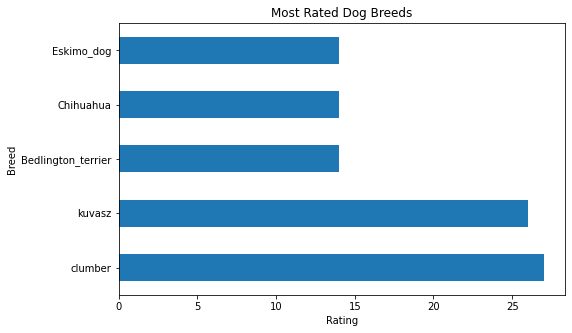

In [72]:
df_analysis.groupby('breed')['rating'].max().nlargest(5).plot(kind='barh',figsize=(8,5), title="Most Rated Dog Breeds")
plt.xlabel('Rating')
plt.ylabel('Breed')
plt.show()

- The Most Rated dog breed is the clumber

## Insight #3
What dog breed has the most retweet count?

In [95]:
df_analysis.groupby('breed')['retweet_count'].max().nlargest(5)

breed
Chihuahua           56625
Eskimo_dog          52360
Lakeland_terrier    48265
English_springer    45849
standard_poodle     42228
Name: retweet_count, dtype: int64

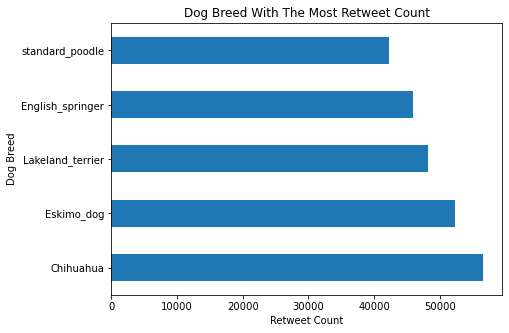

In [84]:
df_analysis.groupby('breed')['retweet_count'].max().nlargest(5).plot(kind='barh', figsize=(7,5), title='Dog Breed With The Most Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Dog Breed')
plt.show()

- The Chihuahua is the dog breed with the most retweets. Which shows that it has quite a large fanbase. The Eskimo dog breed isn't far behind coming in second.

## Insight #4
What is the most common dog stage?

In [96]:
df_analysis.stages.value_counts(ascending=True)[:4]

floofer      7
puppo       19
doggo       45
pupper     120
Name: stages, dtype: int64

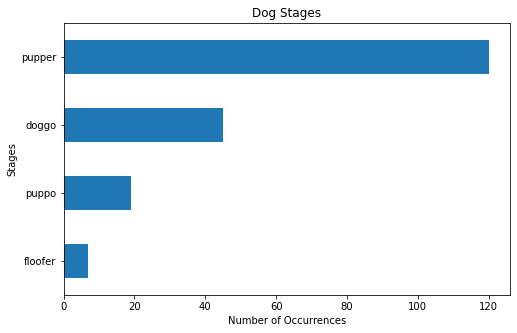

In [90]:
df_analysis.stages.value_counts(ascending=True)[:4].plot(kind='barh',figsize=(8,5), title="Dog Stages")
plt.xlabel('Number of Occurrences')
plt.ylabel('Stages')
plt.show()